# 1. Download the dataset: https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification/data

# 2. Importe Required libararies 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping
%matplotlib inline

# 3. Read dataset and pre-processing

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.shape

(5572, 5)

Text(0.5, 1.0, 'Number of ham and spam messages')

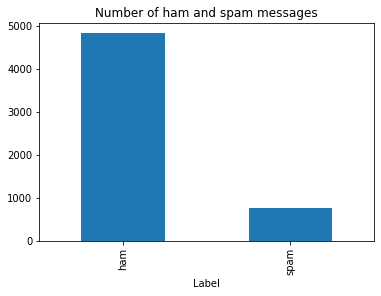

In [ ]:
#plot the ham and spam messages to understand the distribution
df['v1'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
X = df.v2
Y = df.v1
#label encoding for Y
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

 Train-test split

In [ ]:
#split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

 Tokenizer

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = keras.utils.pad_sequences(sequences,maxlen=max_len)

# 4. Add Layers(LSTM, Dense-(Hidden Layers), Output)

In [ ]:
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)

# 5. Create Model

In [ ]:
model = Model(inputs=inputs,outputs=layer)

# 6. Compile the Model

In [ ]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

# 7.Fit the Model

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
28/28 [==============================] - 11s 282ms/step - loss: 0.3343 - accuracy: 0.8780 - val_loss: 0.1562 - val_accuracy: 0.9507
Epoch 2/10
28/28 [==============================] - 7s 260ms/step - loss: 0.0921 - accuracy: 0.9770 - val_loss: 0.0620 - val_accuracy: 0.9765


# 8. Save the Model

In [ ]:
model.save('spam_lstm_model.h5')

# 9.Test the Model

In [ ]:
#processing test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = keras.utils.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
#evaluation of our model
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

35/35 [==============================] - 1s 22ms/step - loss: 0.0648 - accuracy: 0.9785
Test set
  Loss: 0.065
  Accuracy: 0.978
